# Exploratory Analysis

In [1]:
# Importing Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("credit_risk_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
person_age                    32581 non-null int64
person_income                 32581 non-null int64
person_home_ownership         32581 non-null object
person_emp_length             31686 non-null float64
loan_intent                   32581 non-null object
loan_grade                    32581 non-null object
loan_amnt                     32581 non-null int64
loan_int_rate                 29465 non-null float64
loan_status                   32581 non-null int64
loan_percent_income           32581 non-null float64
cb_person_default_on_file     32581 non-null object
cb_person_cred_hist_length    32581 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


*Observations:*

1. We can see that there are 12 columns of varying data types. 
2. Some columns have missing entries (person_emp_length and loan_int_rate).

In [2]:
# Count number of Categorical and Numerical columns
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']

print(categorical_columns)
print(numerical_columns)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
['person_age', 'person_income', 'person_emp_length', 'loan_amt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


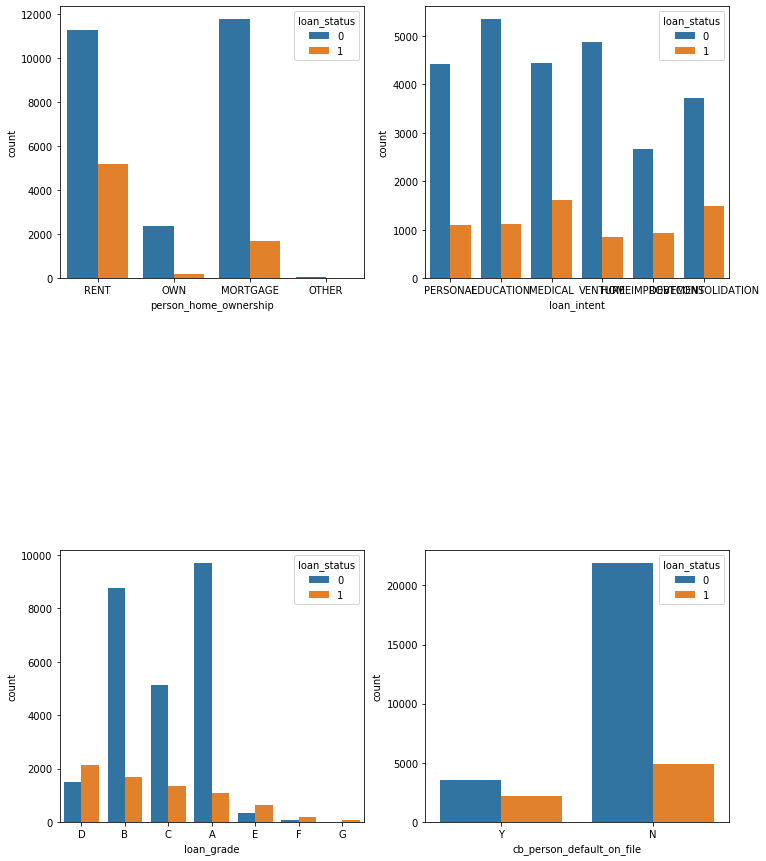

In [3]:
# Analyze Categorical columns
fig,axes = plt.subplots(2,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='loan_status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

### Plots convey the following information about the dataset:
1. People who are renting or mortgaging their homes recieve more loans, with renters defaulting more commonly.
2. More people recieve loans for education, medical expenses, and venture related reasons than other categories. Medical loans have the most defaults.
3. The higher the grade of the loan (A, B, C, etc.) the less likely it is to default.
4. If a person has a default on file, they are less likely to recieve a loan and more likely to default again.

AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'

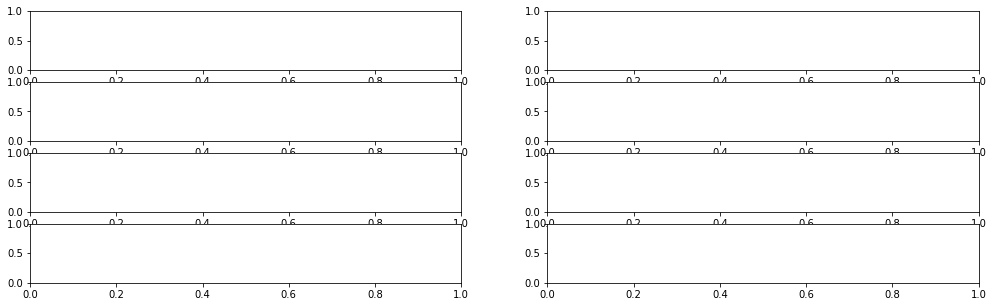

In [8]:
# Analyze Numerical columns
fig,axes = plt.subplots(4,2,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='loan_status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [5]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "credit_risk_dataset.csv"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

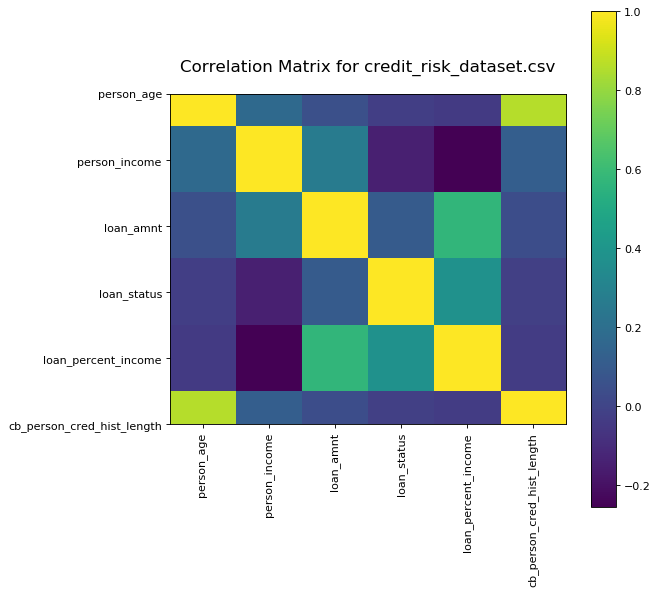

In [6]:
plotCorrelationMatrix(df, 8)